In [1]:
import bt
import pandas as pd

In [2]:
%matplotlib inline

In [10]:
data = bt.get('aapl,msft', start='2010-01-01')
sma = data.rolling(5).mean()
print('data \n', data)
print('sma \n', sma)

data 
                   aapl        msft
Date                              
2009-12-31    6.415358   23.323427
2010-01-04    6.515213   23.683067
2010-01-05    6.526476   23.690722
2010-01-06    6.422665   23.545328
2010-01-07    6.410790   23.300465
...                ...         ...
2022-11-29  141.169998  240.330002
2022-11-30  148.029999  255.139999
2022-12-01  148.309998  254.690002
2022-12-02  147.809998  255.020004
2022-12-05  146.630005  250.199997

[3255 rows x 2 columns]
sma 
                   aapl        msft
Date                              
2009-12-31         NaN         NaN
2010-01-04         NaN         NaN
2010-01-05         NaN         NaN
2010-01-06         NaN         NaN
2010-01-07    6.458100   23.508602
...                ...         ...
2022-11-29  146.950000  244.438000
2022-11-30  146.520001  246.460001
2022-12-01  145.967999  247.882001
2022-12-02  145.907999  249.388000
2022-12-05  146.389999  251.076001

[3255 rows x 2 columns]


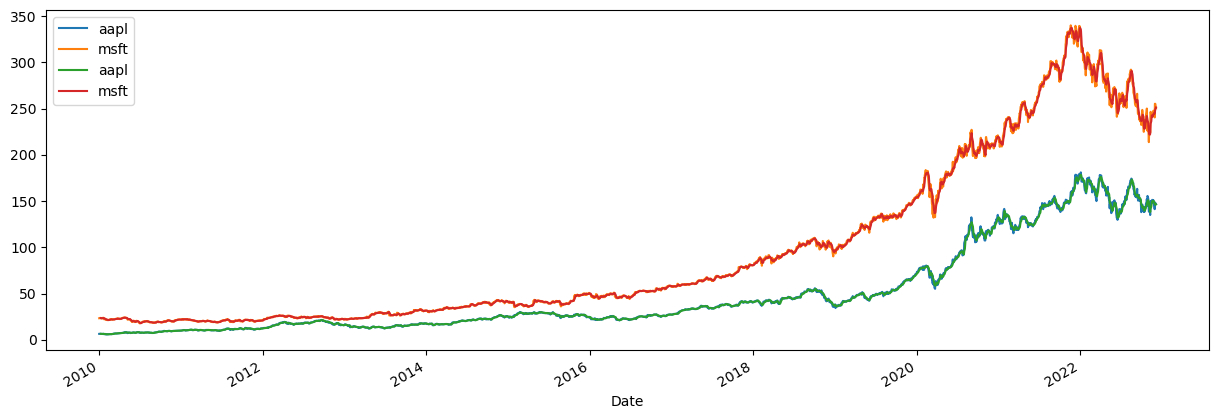

In [11]:
plot = bt.merge(data, sma).plot(figsize=(15,5))

In [12]:
class SelectWhere(bt.Algo):
    def __init__(self, signal):
        self.signal = signal
    
    def __call__(self, target):
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]
            selected = list(sig.index[sig])
            target.temp['selected'] = selected
        return True

In [13]:
signal = data > sma

In [14]:
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
t = bt.Backtest(s, data)
res = bt.run(t)

<AxesSubplot:title={'center':'Equity Progression'}>

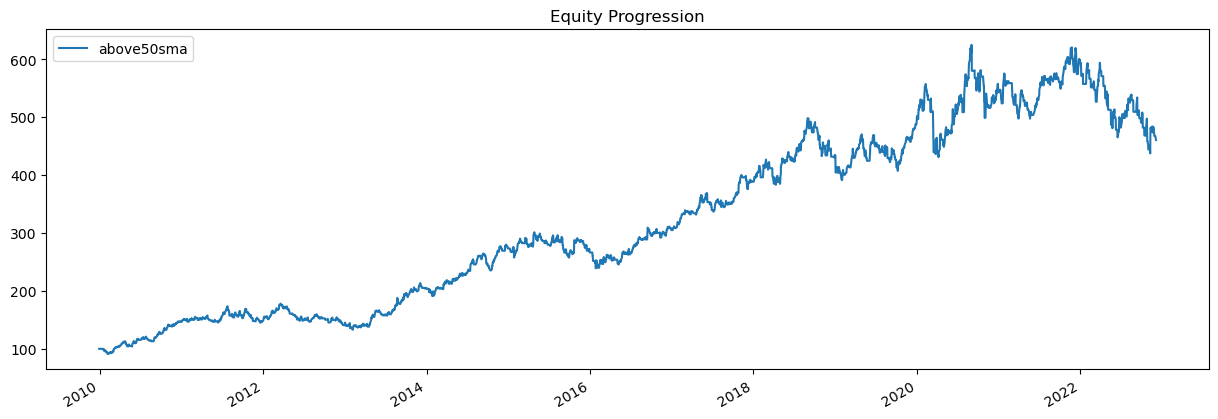

In [15]:
res.plot()

In [16]:
res.display()

Stat                 above50sma
-------------------  ------------
Start                2009-12-30
End                  2022-12-05
Risk-free rate       0.00%

Total Return         360.41%
Daily Sharpe         0.72
Daily Sortino        1.10
CAGR                 12.53%
Max Drawdown         -29.99%
Calmar Ratio         0.42

MTD                  -1.44%
3m                   -9.55%
6m                   -7.73%
YTD                  -22.49%
1Y                   -20.27%
3Y (ann.)            0.23%
5Y (ann.)            4.09%
10Y (ann.)           12.00%
Since Incep. (ann.)  12.53%

Daily Sharpe         0.72
Daily Sortino        1.10
Daily Mean (ann.)    13.62%
Daily Vol (ann.)     18.90%
Daily Skew           -0.58
Daily Kurt           10.64
Best Day             8.23%
Worst Day            -13.80%

Monthly Sharpe       0.73
Monthly Sortino      1.36
Monthly Mean (ann.)  13.49%
Monthly Vol (ann.)   18.42%
Monthly Skew         -0.27
Monthly Kurt         -0.19
Best Month           13.10%
Worst Month    

In [18]:
def above_sma(tickers, sma_per=50, start='2010-01-01', name='above_sma'):
    data = bt.get(tickers, start=start)
    sma = data.rolling(sma_per).mean()
    s = bt.Strategy(name, [SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, data)

In [ ]:
def long_only_ew(tickers, start='2010-01-01', name='long_only_ew'):
    